# FLIP(01):  Advanced Data Science
**(Module 02: Machine Learning)**

---
- Materials in this module include resources collected from various open-source online repositories.
- You are free to use, but NOT allowed to change or distribute this package.

Prepared by and for 
**Student Members** |
2006-2018 [TULIP Lab](http://www.tulip.org.au)

---


# Session 01 - MLGridSearch

# Grid-search
## 1.Tuning the hyper-parameters of an estimator
Hyper-parameters are parameters that are not directly learnt within estimators. In scikit-learn they are passed as arguments to the constructor of the estimator classes. Typical examples include C, kernel and gamma for Support Vector Classifier, alpha for Lasso, etc.

It is possible and recommended to search the hyper-parameter space for the best <font color = 'blue'>cross validation</font> score.

Any parameter provided when constructing an estimator may be optimized in this manner. Specifically, to find the names and current values for all parameters for a given estimator, use:

A search consists of:

    * an estimator (regressor or classifier such as sklearn.svm.SVC());
    * a parameter space;
    * a method for searching or sampling candidates;
    * a cross-validation scheme; and
    * a score function.
    
Some models allow for specialized, efficient parameter search strategies, <font color = 'blue'>outlined below</font>. Two generic approaches to sampling search candidates are provided in scikit-learn: for given values, <font color = 'blue'>GridSearchCV</font> exhaustively considers all parameter combinations, while <font color = 'blue'>RandomizedSearchCV</font> can sample a given number of candidates from a parameter space with a specified distribution. After describing these tools we detail best practice applicable to both approaches.

Note that it is common that a small subset of those parameters can have a large impact on the predictive or computation performance of the model while others can be left to their default values. It is recommended to read the docstring of the estimator class to get a finer understanding of their expected behavior, possibly by reading the enclosed reference to the literature.    

### Exhaustive Grid Search

The grid search provided by <font color = 'blue'>GridSearchCV</font> exhaustively generates candidates from a grid of parameter values specified with the param_grid parameter. For instance, the following param_grid:

In [1]:
param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]

specifies that two grids should be explored: one with a linear kernel and C values in [1, 10, 100, 1000], and the second one with an RBF kernel, and the cross-product of C values ranging in [1, 10, 100, 1000] and gamma values in [0.001, 0.0001].

The <font color = 'blue'>GridSearchCV</font> instance implements the usual estimator API: when “fitting” it on a dataset all the possible combinations of parameter values are evaluated and the best combination is retained.

### Randomized Parameter Optimization

While using a grid of parameter settings is currently the most widely used method for parameter optimization, other search methods have more favourable properties. RandomizedSearchCV implements a randomized search over parameters, where each setting is sampled from a distribution over possible parameter values. 

</br>This has two main benefits over an exhaustive search:<br/>

    A budget can be chosen independent of the number of parameters and possible values.
    Adding parameters that do not influence the performance does not decrease efficiency.

Specifying how parameters should be sampled is done using a dictionary, very similar to specifying parameters for <font color = 'blue'>GridSearchCV</font>. Additionally, a computation budget, being the number of sampled candidates or sampling iterations, is specified using the n_iter parameter. For each parameter, either a distribution over possible values or a list of discrete choices (which will be sampled uniformly) can be specified:

In [4]:
import scipy.stats

In [5]:
{'C': scipy.stats.expon(scale=100), 'gamma': scipy.stats.expon(scale=.1),
  'kernel': ['rbf'], 'class_weight':['balanced', None]}

{'C': <scipy.stats._distn_infrastructure.rv_frozen at 0x293b6ca4af0>,
 'gamma': <scipy.stats._distn_infrastructure.rv_frozen at 0x293b6ca4c10>,
 'kernel': ['rbf'],
 'class_weight': ['balanced', None]}

This example uses the scipy.stats module, which contains many useful distributions for sampling parameters, such as expon, gamma, uniform or randint. In principle, any function can be passed that provides a rvs (random variate sample) method to sample a value. A call to the rvs function should provide independent random samples from possible parameter values on consecutive calls.

### Tips for parameter search
#### Specifying an objective metric

By default, parameter search uses the score function of the estimator to evaluate a parameter setting. These are the <font color = 'blue'>sklearn.metrics.accuracy_score</font> for classification and <font color = 'blue'>sklearn.metrics.r2_score</font> for regression. For some applications, other scoring functions are better suited (for example in unbalanced classification, the accuracy score is often uninformative). An alternative scoring function can be specified via the scoring parameter to <font color = 'blue'>GridSearchCV, RandomizedSearchCV</font> and many of the specialized cross-validation tools described below. See The scoring parameter: defining model evaluation rules for more details.

sklearn.metrics.accuracy_score

In [6]:
import numpy as np
from sklearn.metrics import accuracy_score
y_pred = [0, 2, 1, 3]
y_true = [0, 1, 2, 3]
accuracy_score(y_true, y_pred)

accuracy_score(y_true, y_pred, normalize=False)

2

In [7]:
accuracy_score(np.array([[0, 1], [1, 1]]), np.ones((2, 2)))

0.5

sklearn.metrics.r2_score 

In [8]:
from sklearn.metrics import r2_score
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
r2_score(y_true, y_pred)  

y_true = [[0.5, 1], [-1, 1], [7, -6]]
y_pred = [[0, 2], [-1, 2], [8, -5]]
r2_score(y_true, y_pred, multioutput='variance_weighted')


y_true = [1,2,3]
y_pred = [1,2,3]
r2_score(y_true, y_pred)

y_true = [1,2,3]
y_pred = [2,2,2]
r2_score(y_true, y_pred)

y_true = [1,2,3]
y_pred = [3,2,1]
r2_score(y_true, y_pred)


-3.0

GridSearchCV

In [9]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
iris = datasets.load_iris()
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(iris.data, iris.target)
 
sorted(clf.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_C',
 'param_kernel',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

ParameterSampler

In [10]:
from sklearn.model_selection import ParameterSampler
from scipy.stats.distributions import expon
import numpy as np
np.random.seed(0)
param_grid = {'a':[1, 2], 'b': expon()}
param_list = list(ParameterSampler(param_grid, n_iter=4))
rounded_list = [dict((k, round(v, 6)) for (k, v) in d.items())
                for d in param_list]
rounded_list == [{'b': 0.89856, 'a': 1},
                 {'b': 0.923223, 'a': 1},
                 {'b': 1.878964, 'a': 2},
                 {'b': 1.038159, 'a': 2}]

True

#### Specifying multiple metrics for evaluation

GridSearchCV and RandomizedSearchCV allow specifying multiple metrics for the scoring parameter.

Multimetric scoring can either be specified as a list of strings of predefined scores names or a dict mapping the scorer name to the scorer function and/or the predefined scorer name(s). See Using multiple metric evaluation for more details.

When specifying multiple metrics, the refit parameter must be set to the metric (string) for which the best_params_ will be found and used to build the best_estimator_ on the whole dataset. If the search should not be refit, set refit=False. Leaving refit to the default value None will result in an error when using multiple metrics.

See Demonstration of multi-metric evaluation on cross_val_score and GridSearchCV for an example usage.

Multiple metric parameter search can be done by setting the scoring parameter to a list of metric scorer names or a dict mapping the scorer names to the scorer callables.

The scores of all the scorers are available in the cv_results_ dict at keys ending in '_&lt;scorer_name&gt;' ('mean_test_precision', 'rank_test_precision', etc…)

The best_estimator_, best_index_, best_score_ and best_params_ correspond to the scorer (key) that is set to the refit attribute.

In [11]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn.datasets import make_hastie_10_2
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

print(__doc__)

Automatically created module for IPython interactive environment


Running GridSearchCV using multiple evaluation metrics

In [12]:
X, y = make_hastie_10_2(n_samples=8000, random_state=42)

# The scorers can be either be one of the predefined metric strings or a scorer
# callable, like the one returned by make_scorer
scoring = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score)}

# Setting refit='AUC', refits an estimator on the whole dataset with the
# parameter setting that has the best cross-validated AUC score.
# That estimator is made available at ``gs.best_estimator_`` along with
# parameters like ``gs.best_score_``, ``gs.best_parameters_`` and
# ``gs.best_index_``
gs = GridSearchCV(DecisionTreeClassifier(random_state=42),
                  param_grid={'min_samples_split': range(2, 403, 10)},
                  scoring=scoring, cv=5, refit='AUC', return_train_score=True)
gs.fit(X, y)
results = gs.cv_results_

Plotting the result

<ipython-input-13-493adb6310cc>:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


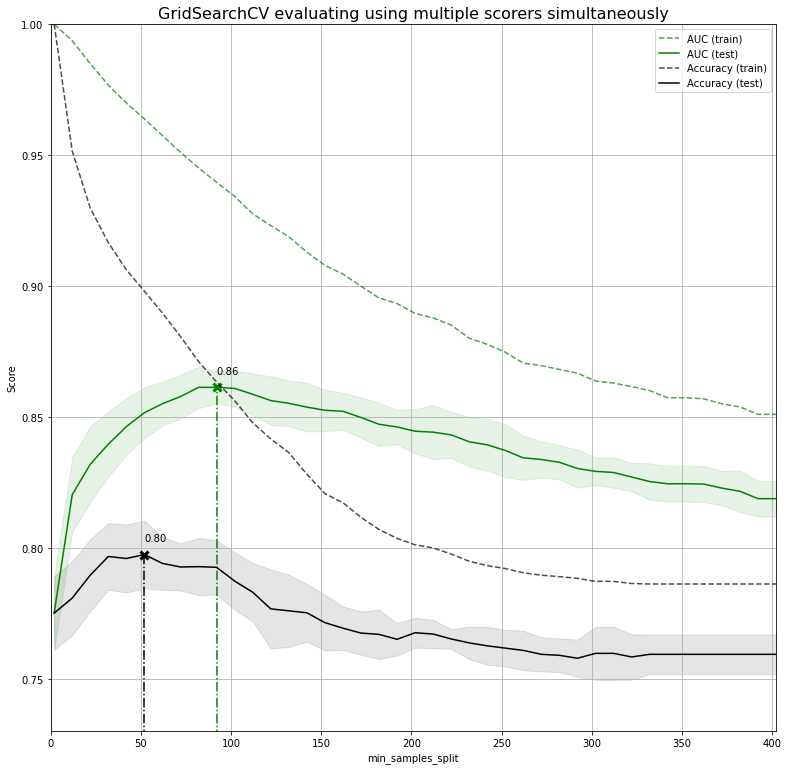

In [13]:
plt.figure(figsize=(13, 13))
plt.title("GridSearchCV evaluating using multiple scorers simultaneously",
          fontsize=16)

plt.xlabel("min_samples_split")
plt.ylabel("Score")
plt.grid()

ax = plt.axes()
ax.set_xlim(0, 402)
ax.set_ylim(0.73, 1)

# Get the regular numpy array from the MaskedArray
X_axis = np.array(results['param_min_samples_split'].data, dtype=float)

for scorer, color in zip(sorted(scoring), ['g', 'k']):
    for sample, style in (('train', '--'), ('test', '-')):
        sample_score_mean = results['mean_%s_%s' % (sample, scorer)]
        sample_score_std = results['std_%s_%s' % (sample, scorer)]
        ax.fill_between(X_axis, sample_score_mean - sample_score_std,
                        sample_score_mean + sample_score_std,
                        alpha=0.1 if sample == 'test' else 0, color=color)
        ax.plot(X_axis, sample_score_mean, style, color=color,
                alpha=1 if sample == 'test' else 0.7,
                label="%s (%s)" % (scorer, sample))

    best_index = np.nonzero(results['rank_test_%s' % scorer] == 1)[0][0]
    best_score = results['mean_test_%s' % scorer][best_index]

    # Plot a dotted vertical line at the best score for that scorer marked by x
    ax.plot([X_axis[best_index], ] * 2, [0, best_score],
            linestyle='-.', color=color, marker='x', markeredgewidth=3, ms=8)

    # Annotate the best score for that scorer
    ax.annotate("%0.2f" % best_score,
                (X_axis[best_index], best_score + 0.005))

plt.legend(loc="best")
plt.grid('off')
plt.show()

#### Composite estimators and parameter spaces

Pipeline: chaining estimators describes building composite estimators whose parameter space can be searched with these tools.

#### Model selection: development and evaluation

Model selection by evaluating various parameter settings can be seen as a way to use the labeled data to “train” the parameters of the grid.

When evaluating the resulting model it is important to do it on held-out samples that were not seen during the grid search process: it is recommended to split the data into a development set (to be fed to the GridSearchCV instance) and an evaluation set to compute performance metrics.

This can be done by using the train_test_split utility function.

In [14]:
import numpy as np
from sklearn.model_selection import train_test_split
X, y = np.arange(10).reshape((5, 2)), range(5)
X

list(y)

[0, 1, 2, 3, 4]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [16]:
X_train

array([[4, 5],
       [0, 1],
       [6, 7]])

In [17]:
y_train

[2, 0, 3]

In [18]:
X_test

array([[2, 3],
       [8, 9]])

In [19]:
y_test

[1, 4]

#### Parallelism

<font color = 'blue'>GridSearchCV</font> and <font color = 'blue'>RandomizedSearchCV</font> evaluate each parameter setting independently. Computations can be run in parallel if your OS supports it, by using the keyword n_jobs=-1. See function signature for more details.

In [20]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
iris = datasets.load_iris()
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(iris.data, iris.target)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')})

In [21]:
sorted(clf.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_C',
 'param_kernel',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

#### Robustness to failure

Some parameter settings may result in a failure to fit one or more folds of the data. By default, this will cause the entire search to fail, even if some parameter settings could be fully evaluated. Setting error_score=0 (or =np.NaN) will make the procedure robust to such failure, issuing a warning and setting the score for that fold to 0 (or NaN), but completing the search.

### Alternatives to brute force parameter search

#### Model specific cross-validation

Some models can fit data for a range of values of some parameter almost as efficiently as fitting the estimator for a single value of the parameter. This feature can be leveraged to perform a more efficient cross-validation used for model selection of this parameter.

The most common parameter amenable to this strategy is the parameter encoding the strength of the regularizer. In this case we say that we compute the regularization path of the estimator.

##### linear_model.ElasticNetCV

In [22]:
from sklearn.linear_model import ElasticNetCV
from sklearn.datasets import make_regression

X, y = make_regression(n_features=2, random_state=0)
regr = ElasticNetCV(cv=5, random_state=0)
regr.fit(X, y)

ElasticNetCV(cv=5, random_state=0)

In [23]:
print(regr.alpha_) 

print(regr.intercept_) 

print(regr.predict([[0, 0]])) 

0.1994727942696716
0.3988829654276791
[0.39888297]


##### linear_model.LassoCV

In [24]:
# Now use lars_path and 1D linear interpolation to compute the
# same path
from sklearn.linear_model import lars_path
alphas, active, coef_path_lars = lars_path(X, y, method='lasso')
from scipy import interpolate
coef_path_continuous = interpolate.interp1d(alphas[::-1],
                                            coef_path_lars[:, ::-1])
print(coef_path_continuous([5., 1., .5]))

[[24.34632349 28.24106684 28.72790976]
 [91.28939238 95.21278876 95.70321331]]


#### Information Criterion

Some models can offer an information-theoretic closed-form formula of the optimal estimate of the regularization parameter by computing a single regularization path (instead of several when using cross-validation).

Here is the list of models benefitting from the Akaike Information Criterion (AIC) or the Bayesian Information Criterion (BIC) for automated model selection:

In [25]:
from sklearn import linear_model
reg = linear_model.LassoLarsIC(criterion='bic')
reg.fit([[-1, 1], [0, 0], [1, 1]], [-1.1111, 0, -1.1111])

print(reg.coef_) 

[ 0.     -1.1111]


#### Out of Bag Estimates

When using ensemble methods base upon bagging, i.e. generating new training sets using sampling with replacement, part of the training set remains unused. For each classifier in the ensemble, a different part of the training set is left out.

This left out portion can be used to estimate the generalization error without having to rely on a separate validation set. This estimate comes “for free” as no additional data is needed and can be used for model selection.

##### ensemble.RandomForestClassifier

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=4,
                           n_informative=2, n_redundant=0,
                           random_state=0, shuffle=False)
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X, y)

RandomForestClassifier(max_depth=2, random_state=0)

In [27]:
print(clf.feature_importances_)

print(clf.predict([[0, 0, 0, 0]]))

[0.14205973 0.76664038 0.0282433  0.06305659]
[1]


##### ensemble.RandomForestRegressor

In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

X, y = make_regression(n_features=4, n_informative=2,
                       random_state=0, shuffle=False)
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X, y)

RandomForestRegressor(max_depth=2, random_state=0)

In [29]:
print(regr.feature_importances_)

print(regr.predict([[0, 0, 0, 0]]))

[0.18146984 0.81473937 0.00145312 0.00233767]
[-8.32987858]
